In [1]:
import numpy as np
import matplotlib.pyplot as plt

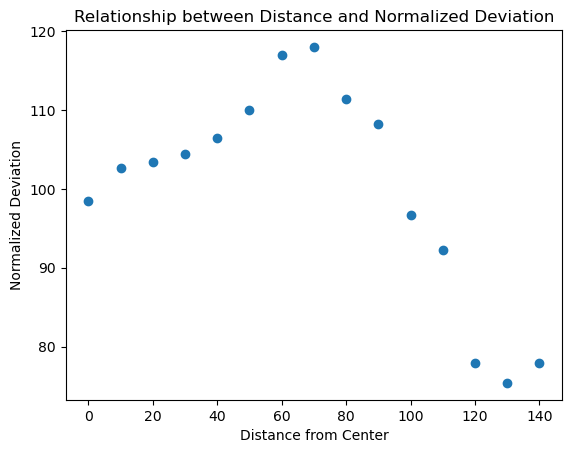

In [3]:
distances = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
normalized_deviations = [98.5, 102.7, 103.4, 104.4, 106.5, 110, 117, 118, 111.4, 108.2, 96.7, 92.2, 77.9, 75.4, 77.9]

plt.scatter(distances, normalized_deviations)
plt.xlabel('Distance from Center')
plt.ylabel('Normalized Deviation')
plt.title('Relationship between Distance and Normalized Deviation')
plt.show()

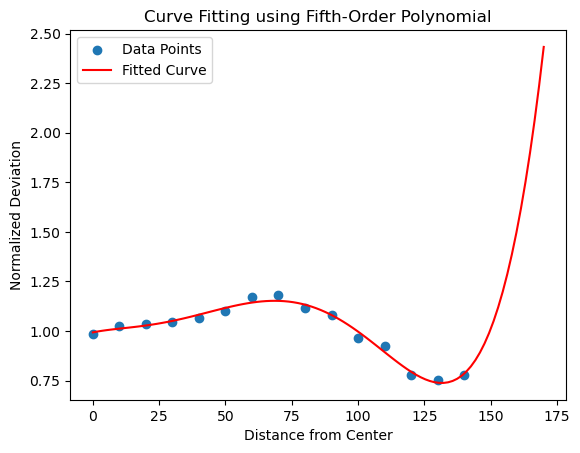

Equation of the Fitted Curve:
y = 2.2994e-10x^5 + -6.2693e-08x^4 + 4.9382e-06x^3 + -0.00012337x^2 + 0.0026929x + 0.99313
[ 2.29936685e-10 -6.26925820e-08  4.93816217e-06 -1.23367030e-04
  2.69293422e-03  9.93132417e-01]


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data points
distances = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
normalized_deviations = [0.985, 1.027, 1.034, 1.044, 1.065, 1.10, 1.17, 1.18, 1.114, 1.082, 0.967, 0.922, 0.779, 0.754, 0.779]

# Define the curve function
def curve_func(x, a, b, c, d, e, f):
    return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f

# Perform the curve fitting
popt, pcov = curve_fit(curve_func, distances, normalized_deviations)

# Generate x values for the curve
x_curve = np.linspace(min(distances), 170, 100)

# Generate y values using the fitted curve parameters
y_curve = curve_func(x_curve, *popt)

# Plot the original data points and the fitted curve
plt.scatter(distances, normalized_deviations, label='Data Points')
plt.plot(x_curve, y_curve, 'r-', label='Fitted Curve')
plt.xlabel('Distance from Center')
plt.ylabel('Normalized Deviation')
plt.title('Curve Fitting using Fifth-Order Polynomial')
plt.legend()
plt.show()

# Print the equation of the fitted curve with 5 significant figures
equation = f"y = {popt[0]:.5g}x^5 + {popt[1]:.5g}x^4 + {popt[2]:.5g}x^3 + {popt[3]:.5g}x^2 + {popt[4]:.5g}x + {popt[5]:.5g}"
print("Equation of the Fitted Curve:")
print(equation)
print(popt)


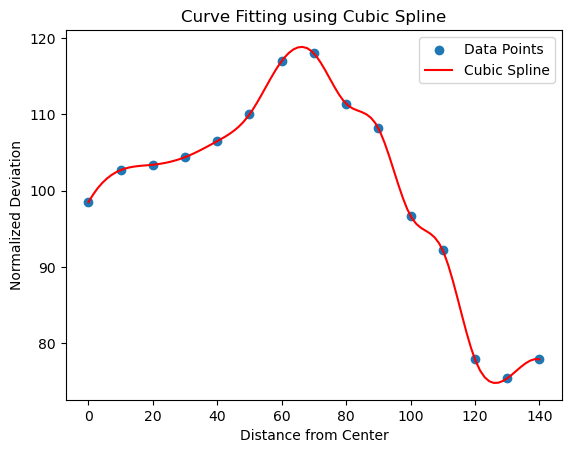

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Data points
distances = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
normalized_deviations = [98.5, 102.7, 103.4, 104.4, 106.5, 110, 117, 118, 111.4, 108.2, 96.7, 92.2, 77.9, 75.4, 77.9]

# Perform the curve fitting using cubic splines
spline = CubicSpline(distances, normalized_deviations)

# Generate x values for the curve
x_curve = np.linspace(min(distances), max(distances), 100)

# Generate y values using the fitted curve
y_curve = spline(x_curve)

# Plot the original data points and the fitted curve
plt.scatter(distances, normalized_deviations, label='Data Points')
plt.plot(x_curve, y_curve, 'r-', label='Cubic Spline')
plt.xlabel('Distance from Center')
plt.ylabel('Normalized Deviation')
plt.title('Curve Fitting using Cubic Spline')
plt.legend()
plt.show()


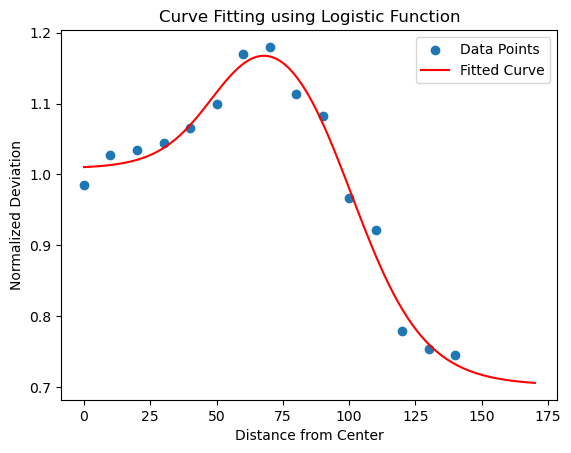

Fitted Curve Parameters:
a1 = 0.09286522699440335
b1 = 50.552689610526706
c1 = 0.2499731233820839
a2 = 0.07206846684892165
b2 = 100.24287333142003
c2 = -0.5563207734584342
d = 1.0085025805388166


In [147]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data points
distances = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
normalized_deviations = [0.985, 1.027, 1.034, 1.044, 1.065, 1.10, 1.17, 1.18, 1.114, 1.082, 0.967, 0.922, 0.779, 0.754, 0.745]

# Define the curve function with translation
def curve_func(x, a1, b1, c1, a2, b2, c2, d):
    return c1 / (1 + np.exp(-a1 * (x - b1))) + c2 / (1 + np.exp(-a2 * (x - b2))) + d

# Define initial guesses
initial_guesses = [0.02, 123, 1.2, 0.08, 92, -0.8, 1]

# Perform the curve fitting
popt, pcov = curve_fit(curve_func, distances, normalized_deviations, p0=initial_guesses, maxfev=5000)

# Generate x values for the curve
x_curve = np.linspace(min(distances), 170, 100)

# Generate y values using the fitted curve parameters
y_curve = curve_func(x_curve, *popt)

# Plot the original data points and the fitted curve
plt.scatter(distances, normalized_deviations, label='Data Points')
plt.plot(x_curve, y_curve, 'r-', label='Fitted Curve')
plt.xlabel('Distance from Center')
plt.ylabel('Normalized Deviation')
plt.title('Curve Fitting using Logistic Function')
plt.legend()
plt.show()

# Print the fitted curve parameters
print("Fitted Curve Parameters:")
print("a1 =", popt[0])
print("b1 =", popt[1])
print("c1 =", popt[2])
print("a2 =", popt[3])
print("b2 =", popt[4])
print("c2 =", popt[5])
print("d =", popt[6])



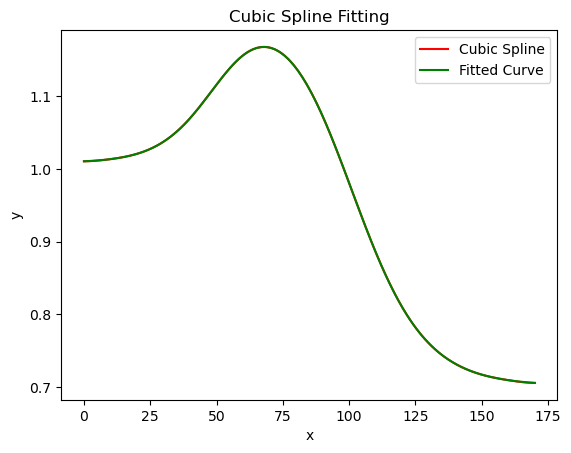

In [148]:
a1, b1, c1, a2, b2, c2, d = popt
x = np.arange(0, 180, 10)
y = c1 / (1 + np.exp(-a1 * (x - b1))) + c2 / (1 + np.exp(-a2 * (x - b2))) + d

# Fit the cubic spline
cs = CubicSpline(x, y, bc_type=((1, 0.0), (1, 0.0)))

# Generate x values for plotting
x_plot = np.linspace(0, 170, 500)

# Evaluate the cubic spline at x_plot
y_plot = cs(x_plot)

# Plot the data points and the fitted spline
plt.plot(x_plot, y_plot, 'r-', label='Cubic Spline')
plt.plot(x_curve, y_curve, color='g', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Fitting')
plt.legend()
plt.show()


#### Dots

In [192]:
CENTER_X = 237.62/2
CENTER_Y = 237.62/2

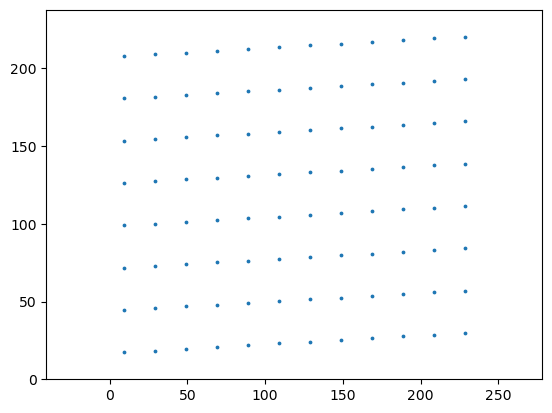

In [193]:
# Read the data from the csv file
front_data = np.genfromtxt("front_data.csv", delimiter=",")
front_x = front_data[:, 0]
front_y = -front_data[:, 1]
plt.scatter(front_x, front_y, s=3)

plt.axis("equal")
plt.xlim(0, 2*CENTER_X)
plt.ylim(0, 2*CENTER_Y)
plt.show()

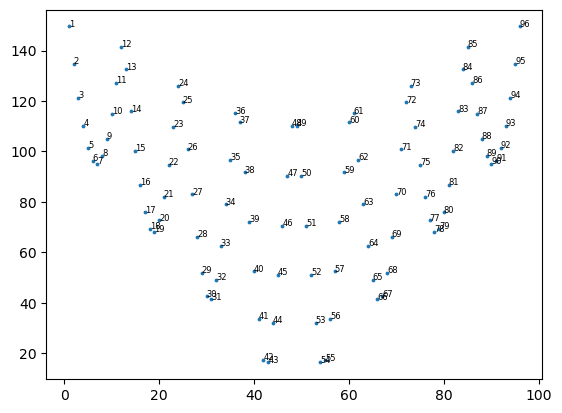

In [194]:
front_radii = []
for i in range(len(front_x)):
    front_radii.append(np.sqrt((front_x[i] - CENTER_X)**2 + (front_y[i] - CENTER_Y)**2))

n = np.arange(1, len(front_radii) + 1)
plt.scatter(n, front_radii, s=3)

# Add data labels to each point
for i in range(len(n)):
    plt.annotate(str(i+1), (n[i], front_radii[i]), fontsize=6)

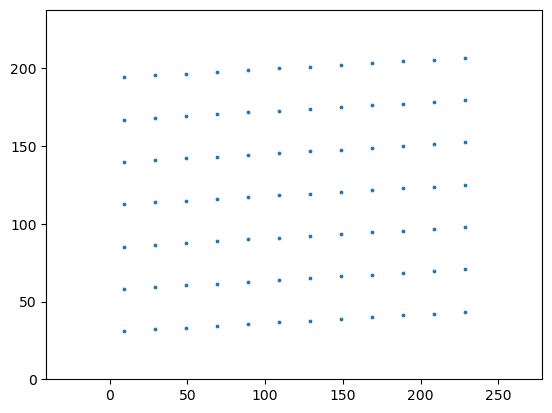

In [195]:
# Read the data from the csv file
data = np.genfromtxt("back_data.csv", delimiter=",")
back_x = data[:, 0]
back_y = -data[:, 1]
plt.scatter(back_x, back_y, s=3)

plt.axis("equal")
plt.xlim(0, 2*CENTER_X)
plt.ylim(0, 2*CENTER_Y)
plt.show()

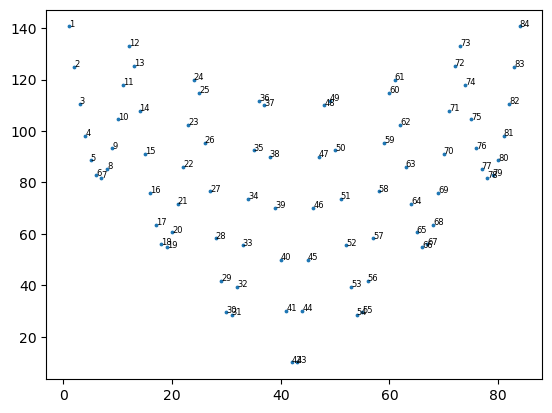

In [196]:
back_radii = []
for i in range(len(back_x)):
    back_radii.append(np.sqrt((back_x[i] - CENTER_X)**2 + (back_y[i] - CENTER_Y)**2))

n = np.arange(1, len(back_radii) + 1)
plt.scatter(n, back_radii, s=3)

# Add data labels to each point
for i in range(len(n)):
    plt.annotate(str(i+1), (n[i], back_radii[i]), fontsize=6)

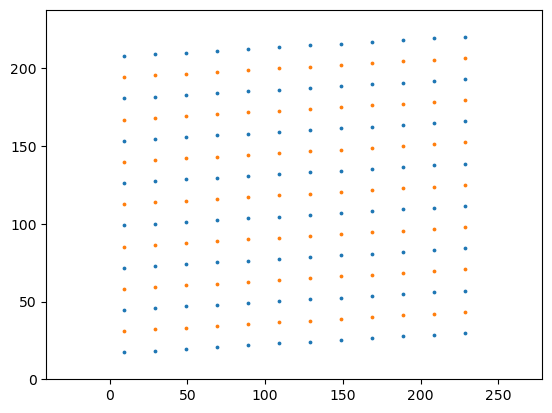

In [235]:
plt.scatter(front_x, front_y, s=3)
plt.scatter(back_x, back_y, s=3)

plt.axis("equal")
plt.xlim(0, 2*CENTER_X)
plt.ylim(0, 2*CENTER_Y)
plt.show()

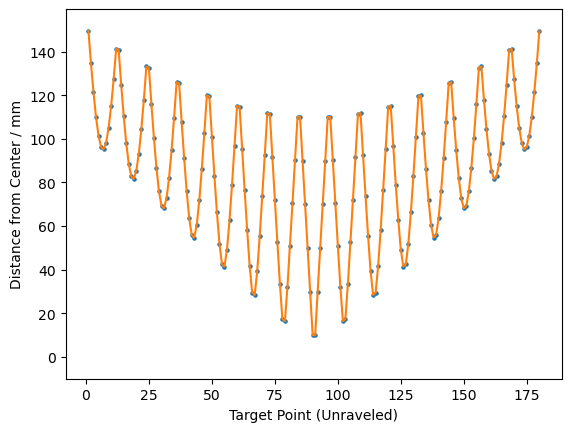

In [232]:
merged_radii = []
for i in range(0, len(front_radii), 12):
    merged_radii.extend(front_radii[i:i+12])
    merged_radii.extend(back_radii[i:i+12])

n = np.arange(1, len(merged_radii) + 1)
plt.xlabel('Target Point (Unraveled)')
plt.ylabel('Distance from Center / mm')
plt.ylim(-10, max(merged_radii) + 10)
plt.plot(n, merged_radii, c='C1')
plt.scatter(n, merged_radii, s=5)


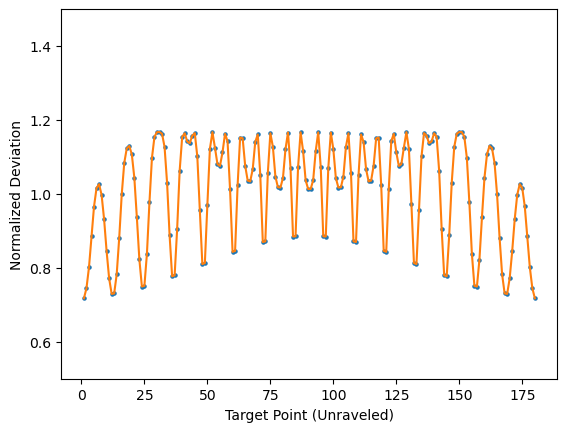

In [239]:
target_deviation = cs(merged_radii)
plt.xlabel('Target Point (Unraveled)')
plt.ylabel('Normalized Deviation')
plt.ylim(0.5, 1.5)
plt.plot(n, target_deviation, c='C1')
plt.scatter(n, target_deviation, s=5)
plt.show()

# Save as csv
np.savetxt("target_deviation.csv", target_deviation, delimiter=",")

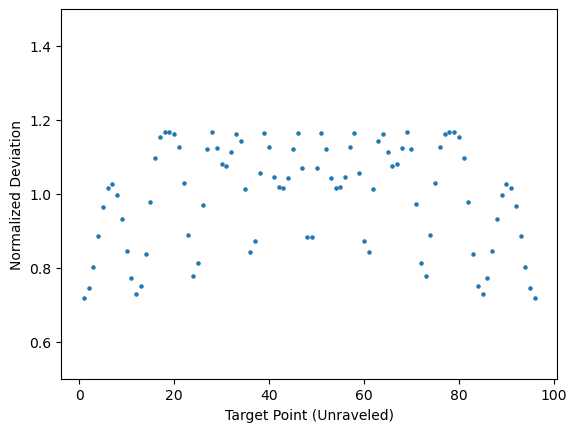

In [244]:
n = np.arange(1, len(front_radii) + 1)
front_deviation = cs(front_radii)
plt.xlabel('Target Point (Unraveled)')
plt.ylabel('Normalized Deviation')
plt.ylim(0.5, 1.5)
plt.scatter(n, front_deviation, s=5)
plt.show()

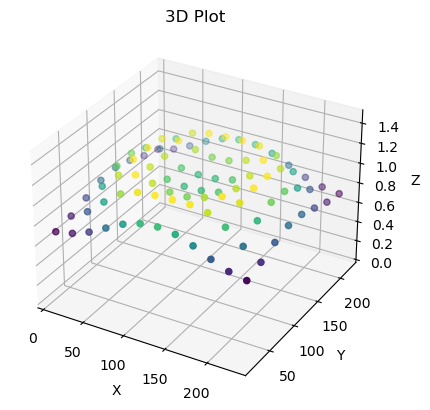

In [356]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Separate the columns of the data array
x = front_data[:, 0]
y = -front_data[:, 1]
z = front_deviation

# Create the figure and Axes3D subplot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the data points
ax.scatter3D(x, y, z, c=z, cmap='viridis')

# Customize the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_zlim(0, 1.5)
ax.set_title('3D Plot')

# Display the plot
plt.show()



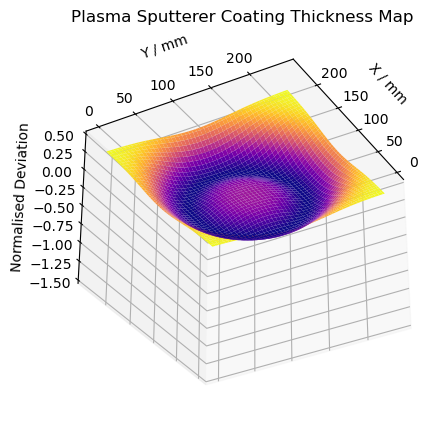

In [360]:
px = np.linspace(0, 237.62, 100)
py = np.linspace(0, 237.62, 100)
XX, YY = np.meshgrid(px, py)
ZZ = -cs(np.sqrt((XX - CENTER_X)**2 + (YY - CENTER_Y)**2)) + 1

# Create the figure and Axes3D subplot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(-32.5, 30)

# Plot the surface
ax.plot_surface(XX, YY, ZZ, cmap='plasma')

# Customize the plot
ax.set_xlabel('X / mm')
ax.set_ylabel('Y / mm')
ax.set_zlabel('Normalised Deviation')
ax.set_zlim(-1.5, 0.5)
ax.set_title('Plasma Sputterer Coating Thickness Map', pad=20)

# Display the plot
plt.show()